# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [48]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [49]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [41]:
27

27

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [50]:
print("Michigan: ")
print(df[df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].mean())
print("Ohio: " )
print(df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].mean())

Michigan: 
276.1666666666667
Ohio: 
282.25


Find the average for your outcome score across all states in 2019

In [51]:
df[df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean()

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [52]:
df.groupby('STATE').max()

,PRIMARY_KEY,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
STATE,,,,,,,,,,,,,,,,,,,,,
ALABAMA,2019_ALABAMA,2019,746933.0,7376725.0,1077070.0,4161103.0,2487353.0,7815467.0,3844055.0,2414860.0,...,59749.0,59663.0,52848.0,472686.0,222182.0,748889.0,233.0,269.0,220.0,259.0
ALASKA,2019_ALASKA,2019,133303.0,2920986.0,420152.0,2026555.0,550320.0,2968341.0,1484610.0,1068849.0,...,10398.0,11140.0,10092.0,82337.0,42063.0,133933.0,237.0,283.0,214.0,261.0
ARIZONA,2019_ARIZONA,2019,981303.0,8802515.0,1245814.0,4204089.0,4128871.0,9580393.0,4296503.0,2983729.0,...,88092.0,86287.0,84854.0,687144.0,354901.0,1110851.0,240.0,283.0,216.0,263.0
ARKANSAS,2019_ARKANSAS,2019,479682.0,5308625.0,827026.0,4075118.0,688145.0,5669431.0,2620399.0,1772639.0,...,38800.0,37279.0,33097.0,296050.0,143487.0,496085.0,240.0,279.0,219.0,262.0
CALIFORNIA,2019_CALIFORNIA,2019,6307022.0,78248042.0,9990221.0,42360470.0,28331207.0,78365958.0,38951948.0,23501848.0,...,493415.0,500143.0,498403.0,3929869.0,2011865.0,6437202.0,235.0,277.0,216.0,263.0
COLORADO,2019_COLORADO,2019,872320.0,9648297.0,969288.0,4354525.0,4578518.0,9557682.0,4578938.0,3170482.0,...,69784.0,67854.0,68112.0,541348.0,270405.0,910280.0,247.0,292.0,227.0,271.0
CONNECTICUT,2019_CONNECTICUT,2019,552512.0,11099837.0,796156.0,4353546.0,6302218.0,10542667.0,6006275.0,3233901.0,...,44682.0,45854.0,41029.0,354391.0,176592.0,577203.0,245.0,289.0,230.0,275.0
DELAWARE,2019_DELAWARE,2019,121845.0,2017075.0,192182.0,1142333.0,737198.0,1975093.0,1072395.0,583951.0,...,10838.0,10492.0,9100.0,83409.0,40903.0,136293.0,243.0,284.0,226.0,266.0
DISTRICT_OF_COLUMBIA,2019_DISTRICT_OF_COLUMBIA,2019,70762.0,1382282.0,184825.0,0.0,1235916.0,1360942.0,559940.0,450060.0,...,6339.0,5196.0,4104.0,45706.0,20242.0,87315.0,235.0,269.0,214.0,250.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [58]:
df["Percent_Instruction"] = df['INSTRUCTION_EXPENDITURE']/df['TOTAL_EXPENDITURE']
df["Rev_per_student"] = df['TOTAL_REVENUE'] / df['ENROLL_ALL']
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,Percent of total expenditure is intruction,Total revenue per student,Percent_Instruction,Rev_per_student
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,731634.0,208.0,252.0,207.0,NaN,0.558333,3.661510,0.558333,3.661510
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,673477.0,215.0,265.0,209.0,NaN,0.422130,4.837699,0.422130,4.837699
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,441490.0,210.0,256.0,211.0,NaN,0.553248,3.877685,0.553248,3.877685
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,5254844.0,208.0,261.0,202.0,NaN,0.529091,4.997299,0.529091,4.997299
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,612635.0,221.0,272.0,217.0,NaN,0.503079,5.199137,0.503079,5.199137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,247.0,287.0,224.0,262.0,NaN,NaN,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,240.0,286.0,220.0,266.0,NaN,NaN,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,231.0,272.0,213.0,256.0,NaN,NaN,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,242.0,289.0,220.0,267.0,NaN,NaN,NaN,NaN


Feature engineering justification: I created two new features. The first measures what percent of total expenditure is instruction expediture, as I thought that perhaps the more the state spent on instruction relative to the whole may have an impact on children's learning. Second, I thought that maybe the more the revenue per each student could indicate a trend, as more I'd guess that wealthier areas would have significantly higher scores than less wealthy areas.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

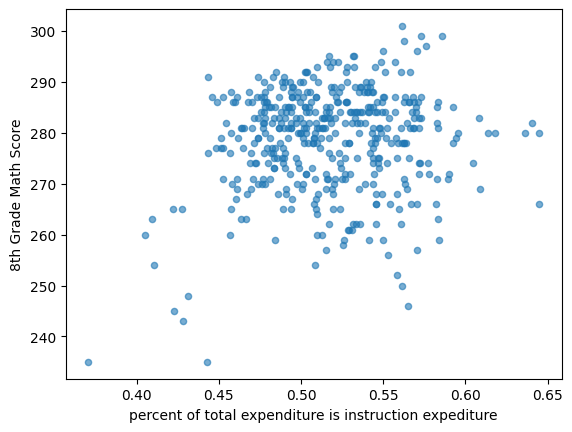

In [59]:
df.plot.scatter(x='Percent_Instruction', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('percent of total expenditure is instruction expediture')
plt.ylabel('8th Grade Math Score')

This shows 8th Grade Math scores as the percent of total expenditures is instruction expenditure increases. There does seem to be some sort of correlation, but not a super strong one.

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

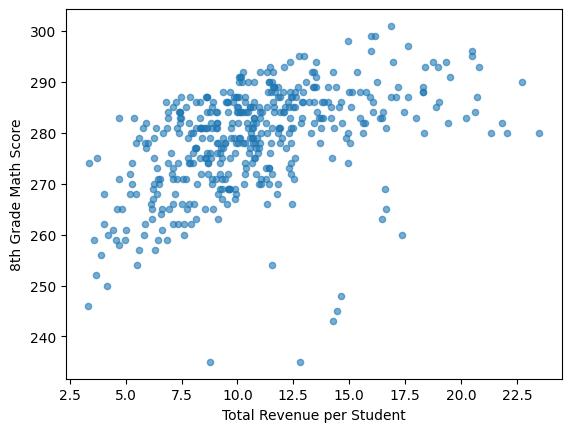

In [60]:
df.plot.scatter(x='Rev_per_student', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Total Revenue per Student')
plt.ylabel('8th Grade Math Score')

This shows 8th grade math score as the total revenue per student increases. You can see a pretty strong correlation here, which generally shows that the more the state makes in revenue, the better their students are going to perform. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
X = df[['Rev_per_student','Percent_Instruction']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
# create your model here
model = LinearRegression()

In [67]:
model.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [70]:
print(model.score(X_test, y_test))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.2733931074653828
9.83571353230003


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

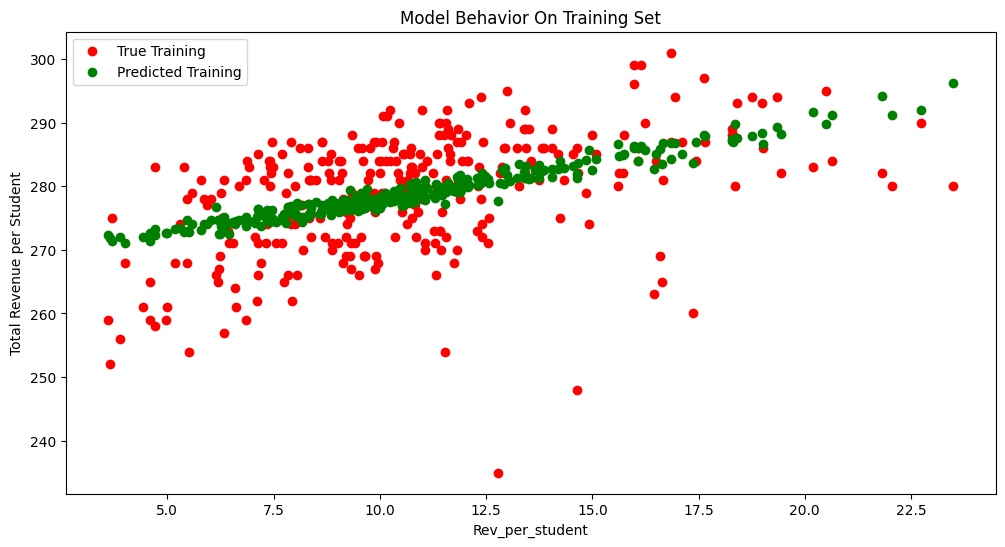

In [71]:
col_name = 'Rev_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Total Revenue per Student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

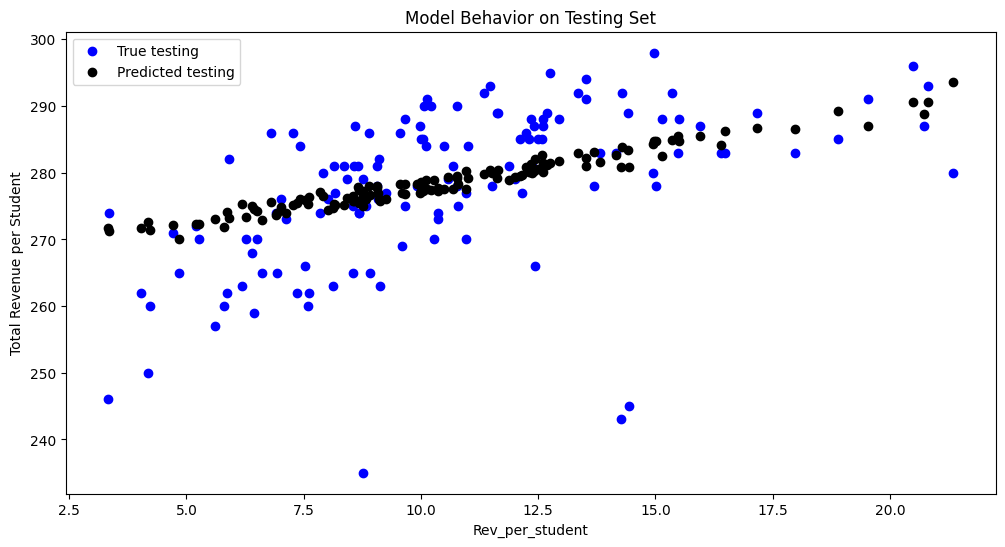

In [72]:
col_name = 'Rev_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Total Revenue per Student')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

After cleaning the data of my initial data set, I decided to test two different predictor variables in regards to the grade 8 math score. One, how much of the total expenditure of the state is instructional, and two, the state's revenue per person. After creating scatter plots with each variable (as seen above) I noticed a small trend in regards to instruction expenditure percentage, but a more significant one with revenue per student. After using a linear model to test this data, the trends seemed to continue, indicating that generally the more revenue a state takes in, the better their students will do at eighth grade math. I would suggest that this trend also likely is true for other subjects/grades, though further analysis would be needed. Overall, this trend is likely due to more wealthy areas, which allow students for more access to tools for schooling as well as other advantages. 